In [42]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
0: 加权蒸馏 0.880
1: 逐个蒸馏 0.850
2: 服务器交换参数 0.825
3: 客户端单独训练, 不使用公开数据 0.876/0.867
4: 客户端单独训练，使用公开数据 0.869
'''

file_path = './res/mnist_model_1_algo_0/alpha_0.5_T_6/server_commu_50_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
data = torch.load(file_path, map_location='cpu')

print(data.keys())

dict_keys(['args', 'server_model', 'server_acc', 'client_model', 'client_acc', 'train_acc', 'client_loss'])


2475 [0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.10321608185768127, 0.1119598001241684, 0.14271356165409088, 0.15206030011177063, 0.1824120581150055, 0.23527638614177704, 0.2883417010307312, 0.365025132894516, 0.3982914388179779, 0.5215075612068176, 0.5489447116851807, 0.561909556388855, 0.631155788898468, 0.6375879049301147, 0.6775879263877869, 0.6928642988204956, 0.6352763772010803, 0.7207034826278687, 0.7456281185150146, 0.7599999904632568, 0.7597990036010742, 0.7512562870979309, 0.7456281185150146, 0.6269346475601196, 0.7113567590713501, 0.6719598174095154, 0.704723596572876, 0.7025125622749329, 0.7412060499191284, 0.7638190984725952, 0.7692462205886841, 0.7673366665840149, 0.7621105313301086, 0.6671356558799744, 0.7273367047309875, 0.7467336654663086, 0.745829164981842, 0.7

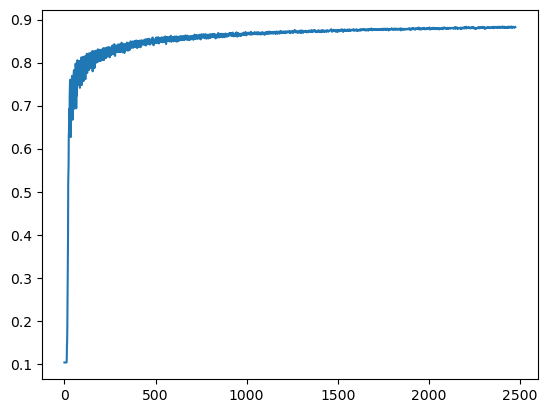

In [43]:
client_acc = data['client_acc']
# print(len(client_acc[0]))
num_line = len(client_acc[0])
x = numpy.arange(num_line)
for i in x[:1]:
    y = numpy.array(client_acc[i])
    plt.plot(x, y)
print(len(y), list(y))
plt.show()

0 [2.3900582790374756, 2.3661599159240723, 2.348306179046631, 2.3242876529693604, 2.294862747192383, 2.263740301132202, 2.2302238941192627, 2.181185245513916, 2.147925615310669, 2.086388111114502, 2.01935076713562, 1.961355209350586, 1.8668105602264404, 1.865678071975708, 1.7141155004501343, 1.5771236419677734, 1.4674668312072754, 1.4114528894424438, 1.276057481765747, 1.3357694149017334, 1.2135865688323975, 1.205479383468628, 1.011707067489624, 0.9366843104362488, 0.8875120878219604, 0.8349558115005493, 1.1780034303665161, 0.42436662316322327, 1.032949686050415, 0.7500641942024231, 0.9979341626167297, 0.9747092127799988, 0.9175071716308594, 1.1148269176483154, 0.847723126411438, 0.9544914364814758, 0.994377613067627, 0.9463923573493958, 0.8891686201095581, 0.988139271736145, 0.8651016354560852, 1.1230442523956299, 0.8425916433334351, 0.785179615020752, 1.002213478088379, 1.13816237449646, 0.9844150543212891, 0.8646594882011414, 1.0880212783813477, 0.900129497051239, 0.7820042371749878

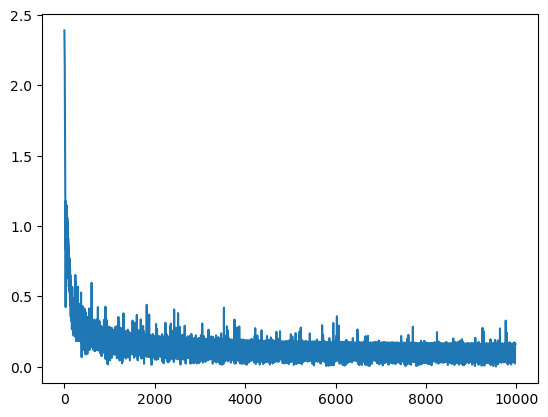

In [44]:
client_loss = data['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
# print(len(client_loss[0]), num_line, len(x))
for i in [0, ]:
    print(i,client_loss[i])
    y = numpy.array(client_loss[i])
    plt.plot(x, y)
# print(y)
# idx = numpy.where(y < 0)
# print(idx)
plt.show()

[0.10321608185768127, 0.10321608185768127, 0.12351758778095245, 0.3749748766422272, 0.6645225882530212, 0.753467321395874, 0.7661306262016296, 0.7793969511985779, 0.7879396677017212, 0.7976884245872498, 0.8053266406059265, 0.8091457486152649, 0.8152763843536377, 0.8174874186515808, 0.8211055397987366, 0.8204020261764526, 0.8222110271453857, 0.8247236013412476, 0.8266331553459167, 0.8285427093505859, 0.8292462229728699, 0.8299497365951538, 0.8311557769775391, 0.8324623107910156, 0.8357788920402527, 0.8340703248977661, 0.836281418800354, 0.8374873995780945, 0.8417085409164429, 0.8427135348320007, 0.8393969535827637, 0.8425125479698181, 0.8449246287345886, 0.8457286357879639, 0.8463316559791565, 0.8460301160812378, 0.8475376963615417, 0.8481407165527344, 0.8493466973304749, 0.8499497175216675, 0.8505527377128601, 0.8525627851486206, 0.851959764957428, 0.8526632785797119, 0.8543718457221985, 0.8522613048553467, 0.8548743724822998, 0.8565828800201416, 0.856783926486969, 0.8575879335403442, 

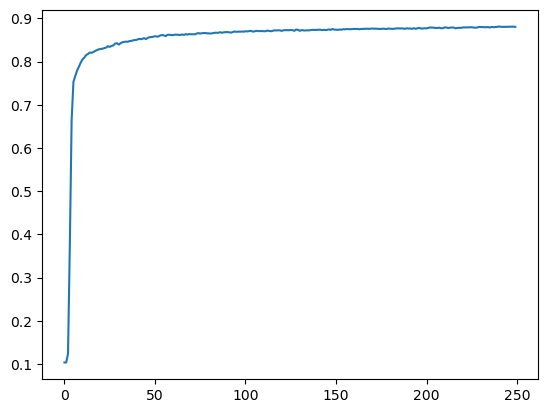

In [45]:
server_acc = data['server_acc']
num_line = len(server_acc[0])
x = numpy.arange(num_line)
for i in x[:1]:
    y = numpy.array(server_acc[i])
    plt.plot(x, y)
print(list(y))
plt.show()

[0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7799999713897705, 0.7949999570846558, 0.7949999570846558, 0.7999999523162842, 0.8149999976158142, 0.8199999928474426, 0.8349999785423279, 0.8299999833106995, 0.8349999785423279, 0.85999995470047, 0.8399999737739563, 0.8650000095367432, 0.875, 0.875, 0.8849999904632568, 0.85999995470047, 0.8949999809265137, 0.8849999904632568, 0.8899999856948853, 0.8849999904632568, 0.85999995470047, 0.8549999594688416, 0.8650000095367432, 0.875, 0.85999995470047, 0.8849999904632568, 0.8849999904632568, 0.8999999761581421, 0.8949999809265137, 0.8849999904632568, 0.8799999952316284, 0.8499999642372131, 0.8650000095367432, 0.8849999904632568, 0.8899999856948853, 0.8999999761581421, 0.8949999809265137, 0.8999999761581421, 0.9049999713897705, 0.8849

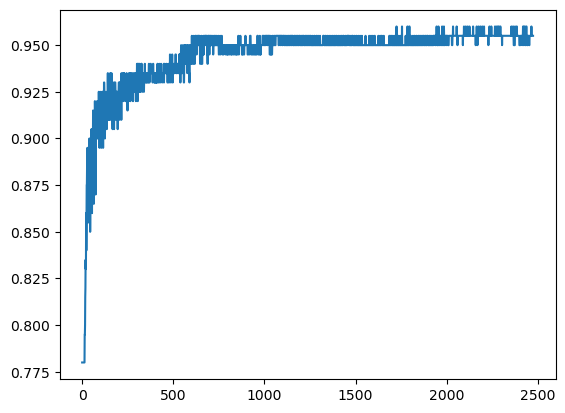

In [46]:
train_acc = data['train_acc']
num_line = len(train_acc[0])
x = numpy.arange(num_line)
for i in x[:1]:
    y = numpy.array(train_acc[i])
    plt.plot(x, y)
print(list(y))
plt.show()